In [73]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
#import yaml
import requests
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from difflib import SequenceMatcher

**1. QS World Ranking website scrapping**

In [2]:
url = "https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508196855735"
#Doing http request to get the text file
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [3]:
#HAMIMUL EXPLAIN YOURSELF PLEASE
results_page = BeautifulSoup(response.content.decode("utf-8", errors='ignore'),'html.parser')
data_string=str(results_page)


In [4]:
import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext
l=cleanhtml(str(data_string))
m=json.dumps(l)
n=json.loads(m )

#json_acceptable_string = n.replace("'", "\"")
#r = json.loads(json_acceptable_string)


In [5]:
#AMIMUL EXPLAIN
k=json.loads(n)
df = pd.DataFrame.from_dict(json_normalize(k["data"][:]), orient='columns')

Unfortunatly there is some missing data that we should look up on the page of the university itself.
We look in the html file with the help of using beatiful soup. 

In [6]:
df=df.drop(['guide','logo','core_id','nid','cc','stars'],axis=1)
#Add the columns in which we are going to fill in the data
df=pd.concat([df,pd.DataFrame(columns=['totalStaff','internationalStaff','totalStudents','internationalStudents'])])
baseurl='https://www.topuniversities.com'
#Extract the number from the div class
def extractNumber(div):
    return div.find('div',class_="number").text.strip()
#Get the missing data from each URL. The missing data i
for index,path in enumerate(df['url']):
    
    f=df["rank_display"].iloc[index]
    f=f.replace("=","")
    f=f.split("-")[0]
    #Get the top 200 
    print(index,)
        
    if int(f)>200: 
        indexFinal=index
        df=df.iloc[0:indexFinal]
        break

    #Retrieve html
    response = requests.get(baseurl+path)
    if response.status_code == 200:
        #Create a html parser
        soup=BeautifulSoup(response.content,'html.parser')
        try:
            #find the class total faculty in which we can extract the usefull number.
            mydivs = soup.find_all("div", { "class" : "total faculty" })
            df['totalStaff'].iloc[index]=extractNumber(mydivs[0])
        except IndexError:
            print('missing total staff:  '+str(baseurl+path))
        
        
        
        try:
            mydivs = soup.find_all("div", { "class" : "inter faculty" })
            df['internationalStaff'].iloc[index]=extractNumber(mydivs[0])
        except IndexError:
            print('missing international staff '+str(baseurl+path))

        try:
            mydivs=soup.find_all("div", { "class" : "students-main wrapper col-md-4" })
            df['totalStudents'].iloc[index]=extractNumber(mydivs[0])
        except IndexError:
            print('missing total students:   '+str(baseurl+path))



        try:
            mydivs=soup.find_all("div", { "class" : "int-students-main wrapper col-md-4" })
            df['internationalStudents'].iloc[index]=extractNumber(mydivs[0])
        except IndexError:
            print('missing international students: '+str(baseurl+path))
        
            

        
    else:
        print("Failure")
        
dfFirst=df.copy()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
missing total staff:  https://www.topuniversities.com/universities/new-york-university-nyu
missing international staff https://www.topuniversities.com/universities/new-york-university-nyu
missing total students:   https://www.topuniversities.com/universities/new-york-university-nyu
missing international students: https://www.topuniversities.com/universities/new-york-university-nyu
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
18

In [8]:
df=dfFirst.copy()#Starting of with a clean data frame, for debugging purposes

In [9]:
#Cleaning the numbers
col_list=['internationalStaff','internationalStudents','totalStaff','totalStudents']
df[col_list]=df[col_list].apply(lambda x: x.str.replace(',',''))
df[col_list]=df[col_list].astype(float)

<b>Which are the best universities in term of:(a) ratio between faculty members and students (b) ratio of international students?</b></b>

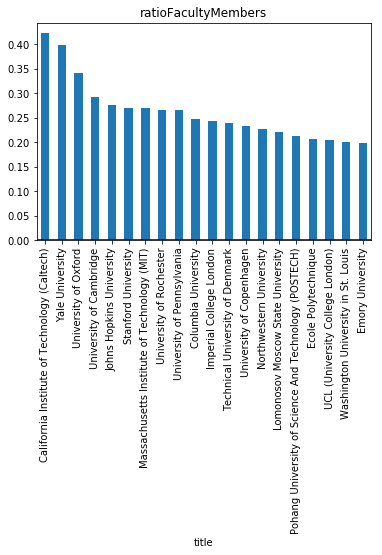

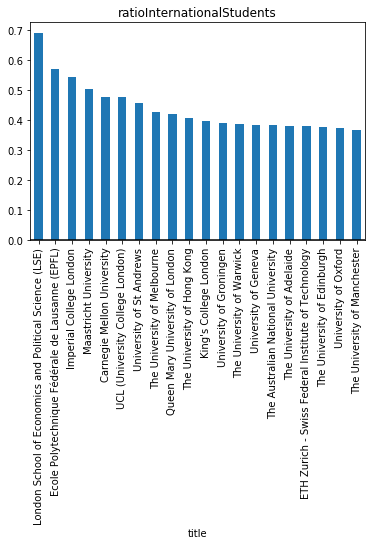

In [10]:
#Getting ratio between faculty members
plt.close()
plt.figure()
df['ratioFacultyMembers']=np.array(df['totalStaff'])/np.array(df['totalStudents'])
dfSortedFacultyMembers=df.sort_values('ratioFacultyMembers',ascending=False).head(20)
s = pd.Series(dfSortedFacultyMembers['ratioFacultyMembers'].values, index=dfSortedFacultyMembers['title'])
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratioFacultyMembers')
plt.show()

#Getting ratio between international students
df['ratioInternationalStudents']=np.array(df.internationalStudents)/np.array(df.totalStudents)
dfSortedInternationalStudents=df.sort_values('ratioInternationalStudents',ascending=False).head(20)
s = pd.Series(dfSortedInternationalStudents['ratioInternationalStudents'].values, index=dfSortedInternationalStudents['title'])
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratioInternationalStudents')
plt.show()



<b>Answer the previous question aggregating the data by (c) country</b>

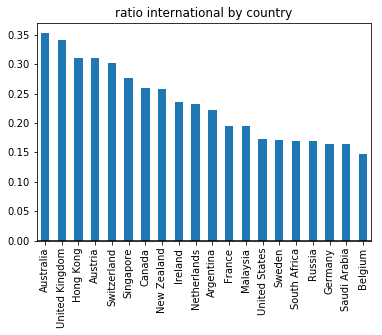

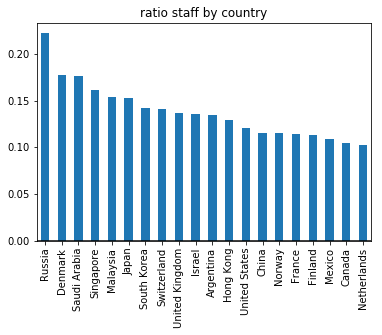

In [11]:
#aggregating by country
countryDict={}
for country,groupDff in df.groupby('country'):
    groupDf=groupDff.dropna(axis=0,how='any')
    staff=np.sum(np.array(groupDf['totalStaff']))/np.sum(np.array(groupDf['totalStudents']))
    international=np.sum(np.array(groupDf['internationalStudents']))/np.sum(np.array(groupDf['totalStudents']))
    countryDict[country]=[staff,international]
#plotting it in the same way as before
t=np.array(list(countryDict.values()))[:,1]
s=pd.Series(t,list(countryDict.keys()))
s=s.sort_values(ascending=False).head(20)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio international by country')
plt.show()


t=np.array(list(countryDict.values()))[:,0]
s=pd.Series(t,list(countryDict.keys()))
s=s.sort_values(ascending=False).head(20)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio staff by country')
plt.show()






<b>Answer the previous question aggregating the data by (d) region</b>

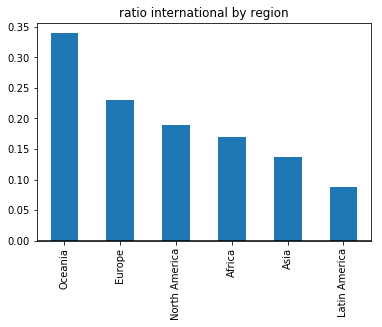

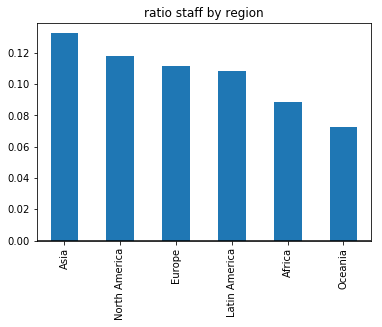

In [12]:
#Aggregating by region
regionDict={}
for region,groupDff in df.groupby('region'):
    groupDf=groupDff.dropna(axis=0,how='any')
    staff=np.sum(np.array(groupDf['totalStaff']))/np.sum(np.array(groupDf['totalStudents']))
    international=np.sum(np.array(groupDf['internationalStudents']))/np.sum(np.array(groupDf['totalStudents']))
    regionDict[region]=[staff,international]

#plotting it in the same way as before
t=np.array(list(regionDict.values()))[:,1]
s=pd.Series(t,list(regionDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio international by region')
plt.show()


t=np.array(list(regionDict.values()))[:,0]
s=pd.Series(t,list(regionDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio staff by region')
plt.show()



**2. Times Higher Education website scrapping**

In [13]:
#HAMIMUL: COMMENT YOUR CODE
url = "https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [14]:
results_page = BeautifulSoup(response.content.decode("utf-8", errors='ignore'),'html.parser')
data_string=str(results_page)

In [15]:
import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext
l=cleanhtml(str(data_string))
m=json.dumps(l)
n=json.loads(m )

#json_acceptable_string = n.replace("'", "\"")
#r = json.loads(json_acceptable_string)

In [16]:
#Output to DataFrame
k=json.loads(n)
df2 = pd.DataFrame.from_dict(json_normalize(k["data"][:]), orient='columns')

In [17]:
#Cleaning up the DataFrame
dftwo = df2[['location','name','rank','stats_number_students','stats_student_staff_ratio','stats_pc_intl_students']].copy()

dftwo['rank']=dftwo['rank'].astype(str)

for index,f in enumerate(dftwo['rank']):
    f=f.replace("=","")
    f=f.split("–")[0]
    #Get the top 200 
    if int(f)>200: 
        indexFinal=index
        break

dftwo=dftwo.iloc[0:indexFinal]
#Remove komma's
dftwo['stats_number_students']=dftwo['stats_number_students'].apply(lambda x: x.replace(',',''))
dftwo['stats_number_students']=dftwo['stats_number_students'].astype(float)

<b>Which are the best universities in term of:(a) ratio between faculty members and students (b) ratio of international students?</b></b>

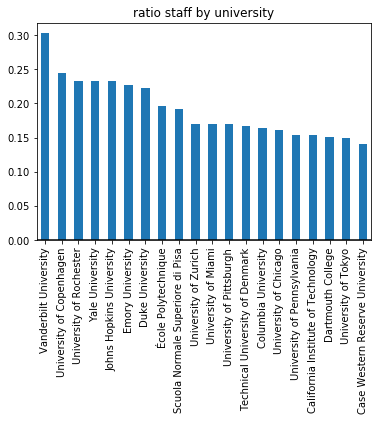

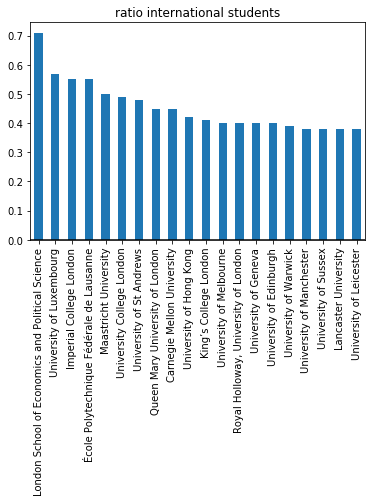

In [18]:
#student staff ratio per university
ratios=1/np.array(dftwo.stats_student_staff_ratio.astype(float))
seriesStaffStudent=pd.Series(ratios,dftwo.name.values)
#Get the top 20
seriesStaffStudent=seriesStaffStudent.sort_values(ascending=False).head(20)
plt.figure()
seriesStaffStudent.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio staff by university')



dftwo.stats_pc_intl_students=dftwo.stats_pc_intl_students.astype(str).str.replace("%","")
dftwo.stats_pc_intl_students=dftwo.stats_pc_intl_students.astype(float)/100
seriesInternationalStudents=pd.Series(dftwo.stats_pc_intl_students.values,dftwo.name.values)
#Get the top 20
seriesInternationalStudents=seriesInternationalStudents.sort_values(ascending=False).head(20)

plt.figure()
seriesInternationalStudents.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio international students')
plt.show()



<b>Answer the previous question aggregating the data by (c) country</b>

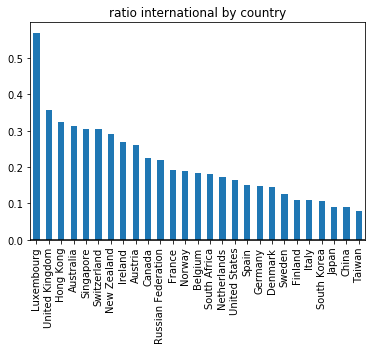

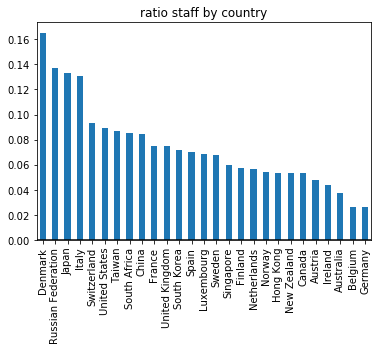

In [19]:
#Aggregating by country

countryDict={}
for country,groupDff in dftwo.groupby('location'):
    groupDf=groupDff.dropna(axis=0,how='any')
    students=np.array(groupDf.stats_number_students).astype(float)
    staff=students/np.array(groupDf.stats_student_staff_ratio).astype(float)
    staffRatio=np.sum(staff)/np.sum(students)
    international=students*np.array(groupDf.stats_pc_intl_students).astype(float)
    internationalRatio=np.sum(international)/np.sum(students)
    countryDict[country]=[staffRatio,internationalRatio]
#plotting it in the same way as before
t=np.array(list(countryDict.values()))[:,1]
s=pd.Series(t,list(countryDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio international by country')
plt.show()


t=np.array(list(countryDict.values()))[:,0]
s=pd.Series(t,list(countryDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio staff by country')
plt.show()   



<b>Answer the previous question aggregating the data by (d) country</b>

In [20]:
dftwoNew=dftwo.copy()

In [21]:
#Creating the regions
#Unfortunatly the information is not in this data frame
#Get the information from the other dataframe
dftwoNew["region"]=np.nan
pd.options.mode.chained_assignment = None  # default='warn'

#Insert the first dataframe (with the top 200)
for index,location in enumerate(dftwoNew["location"]):
    try:
        region=dfFirst[dfFirst["country"]==location].region.values[0]
        dftwoNew["region"].iloc[index]=region
    except (ValueError,IndexError):
        print("could not find region for; "+str(location))
        if location=="Russian Federation":
            dftwoNew.region.iloc[index]="Europe"
        elif location=="Luxembourg":
            dftwoNew.region.iloc[index]="Europe"
            
    

could not find region for; Luxembourg
could not find region for; Russian Federation


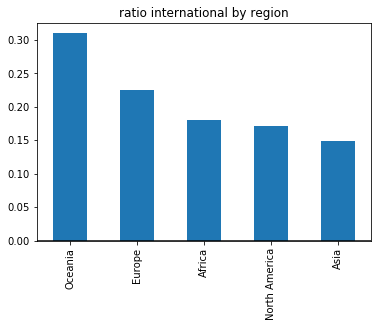

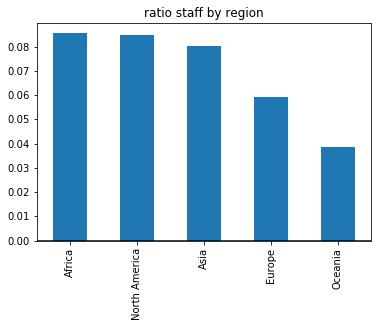

In [22]:
#plotting the region 
regionDict={}
for region,groupDff in dftwoNew.groupby('region'):
    groupDf=groupDff.dropna(axis=0,how='any')
    
    students=np.array(groupDf.stats_number_students).astype(float)
    staff=students/np.array(groupDf.stats_student_staff_ratio).astype(float)
    staffRatio=np.sum(staff)/np.sum(students)
    international=students*np.array(groupDf.stats_pc_intl_students).astype(float)
    internationalRatio=np.sum(international)/np.sum(students)
    regionDict[region]=[staffRatio,internationalRatio]

#plotting it in the same way as before
t=np.array(list(regionDict.values()))[:,1]
s=pd.Series(t,list(regionDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio international by region')
plt.show()


t=np.array(list(regionDict.values()))[:,0]
s=pd.Series(t,list(regionDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio staff by region')
plt.show()




**3. Merging Data Frames**

In [30]:
dftwo

,location,name,rank,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students
0,United Kingdom,University of Oxford,1,20409.0,11.2,0.38
1,United Kingdom,University of Cambridge,2,18389.0,10.9,0.35
2,United States,California Institute of Technology,=3,2209.0,6.5,0.27
3,United States,Stanford University,=3,15845.0,7.5,0.22
4,United States,Massachusetts Institute of Technology,5,11177.0,8.7,0.34
5,United States,Harvard University,6,20326.0,8.9,0.26
6,United States,Princeton University,7,7955.0,8.3,0.24
7,United Kingdom,Imperial College London,8,15857.0,11.4,0.55
8,United States,University of Chicago,9,13525.0,6.2,0.25
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,19233.0,14.6,0.38


In [120]:
#Dealing with differences in the university names
def similar(a,b):
    return SequenceMatcher(None,a,b).ratio()
df_cut = df[['title','rank_display','country','region','totalStaff','totalStudents','internationalStaff','internationalStudents']].copy()
# df_cut['1']='name'
# df_cut['2']='rank'
# df_cut['3']='location'
# df_cut['4']='stats_number_students'
# df_cut['5']='stats_student_staff_ratio'
# df_cut['6']='stats_pc_intl_students'
test2= dftwo.copy()
#Removing inconsistencies in the datasets
test2['name']=test2['name'].str.replace('–','-')
df_cut['title']=df_cut['title'].str.replace('–','-')
title1 = df_cut['title'].str.replace('–','-')
title2= dftwo['name'].str.replace('–','-')


namecol1=df_cut.columns.get_loc("title")
namecol2=test2.columns.get_loc("name")


for index1,name1 in enumerate(title1):
    simularityDict={}
    for index2,name2 in enumerate(title2):
        
        simularityDict[similar(name1,name2)]=name2
    maximum=np.array(list(simularityDict.keys())).max()
    if maximum>0.8:
        maxName=simularityDict[maximum]
        df_cut.iat[index1,namecol1]=maxName  


In [121]:
#Matching the two datasets through a join of the dataframes
testtest = df_cut.copy()

testtest.rename(columns = {'title':'name'}, inplace = True)
final = testtest.merge(test2,how='outer',on='name')
final.fillna(value='unknown',inplace=True)
final


,name,rank_display,country,region,totalStaff,totalStudents,internationalStaff,internationalStudents,location,rank,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students
0,Massachusetts Institute of Technology,1,United States,North America,2982,11067,1679,3717,United States,5,11177,8.7,0.34
1,Stanford University,2,United States,North America,4285,15878,2042,3611,United States,=3,15845,7.5,0.22
2,Harvard University,3,United States,North America,4350,22429,1311,5266,United States,6,20326,8.9,0.26
3,California Institute of Technology,4,United States,North America,953,2255,350,647,United States,=3,2209,6.5,0.27
4,University of Cambridge,5,United Kingdom,Europe,5490,18770,2278,6699,United Kingdom,2,18389,10.9,0.35
5,University of Oxford,6,United Kingdom,Europe,6750,19720,2964,7353,United Kingdom,1,20409,11.2,0.38
6,University College London,7,United Kingdom,Europe,6345,31080,2554,14854,United Kingdom,16,30304,10.5,0.49
7,Imperial College London,8,United Kingdom,Europe,3930,16090,2071,8746,United Kingdom,8,15857,11.4,0.55
8,University of Chicago,9,United States,North America,2449,13557,635,3379,United States,9,13525,6.2,0.25
9,ETH Zurich - Swiss Federal Institute of Techno...,10,Switzerland,Europe,2477,19815,1886,7563,Switzerland,=10,19233,14.6,0.38


In [125]:
#Renaming the Columns
final.columns = ['Institution Name','QS Rank','Country','Region','QS Total Staff','QS Total Students','International Staff','International Students','Location','THE Rank','THE Total Students','Student To Staff Ratio','THE Quota of Int. Students']
final.to_csv("whatever")

**4. Exploratory**

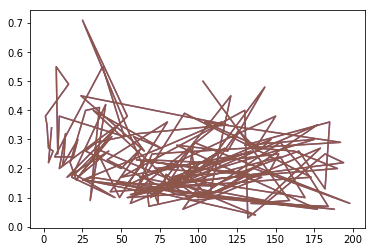

,Institution Name,QS Rank,Country,Region,QS Total Staff,QS Total Students,International Staff,International Students,Location,THE Rank,THE Total Students,Student To Staff Ratio,THE Quota of Int. Students
0,Massachusetts Institute of Technology,1,United States,North America,2982,11067,1679,3717,United States,5,11177,8.7,0.34
1,Stanford University,2,United States,North America,4285,15878,2042,3611,United States,3,15845,7.5,0.22
2,Harvard University,3,United States,North America,4350,22429,1311,5266,United States,6,20326,8.9,0.26
3,California Institute of Technology,4,United States,North America,953,2255,350,647,United States,3,2209,6.5,0.27
4,University of Cambridge,5,United Kingdom,Europe,5490,18770,2278,6699,United Kingdom,2,18389,10.9,0.35
5,University of Oxford,6,United Kingdom,Europe,6750,19720,2964,7353,United Kingdom,1,20409,11.2,0.38
6,University College London,7,United Kingdom,Europe,6345,31080,2554,14854,United Kingdom,16,30304,10.5,0.49
7,Imperial College London,8,United Kingdom,Europe,3930,16090,2071,8746,United Kingdom,8,15857,11.4,0.55
8,University of Chicago,9,United States,North America,2449,13557,635,3379,United States,9,13525,6.2,0.25
9,ETH Zurich - Swiss Federal Institute of Techno...,10,Switzerland,Europe,2477,19815,1886,7563,Switzerland,10,19233,14.6,0.38


In [181]:
#Ranking data deeper on what makes a good university? 
#Correlation with rank and international students
#Correlate other shit 

finalcopy=final.copy()

finalcopy['THE Rank']=finalcopy['THE Rank'].str.replace("=","")
finalcopy['QS Rank']=finalcopy['QS Rank'].str.replace("=","")
finalcopy[finalcopy['THE Rank']=="unknown"]=np.nan
finalcopy[finalcopy['QS Rank']=="unknown"]=np.nan
finalcopy=finalcopy.dropna(axis=0)

plt.plot(finalcopy['THE Rank'],finalcopy['THE Quota of Int. Students'])
plt.show()



"""
rankingTHE=rankingTHE.dropna()
print(rankingTHE)
rankingQS=final['QS Rank'].str.replace("=","")
rankingQS[rankingQS=="unknown"]=np.nan
rankingQS=rankingQS.dropna()

print(rankingQS)
#Correlate rank with international students

plt.plot(rankingQS,ratios)
plt.show()

"""
finalcopy

In [165]:
thingy=final['QS Rank'].str.replace('=','')
thingy[thingy=="unknown"]=np.nan

thingy=thingy.dropna()
thingy

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      90
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      21
23      23
24      23
25      25
26      26
27      27
28      28
29      28
      ... 
169    168
170    169
171    170
172    171
173    172
174    173
175    173
176    173
177    176
178    177
179    178
180    179
181    179
182    181
183    182
184    182
185    182
186    186
187    187
188    188
189    190
190    191
191    192
192    192
193    192
194    195
195    195
196    195
197    199
198    200
Name: QS Rank, Length: 199, dtype: object

**5. Best University**